In [106]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

In [107]:
df=pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [108]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [109]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [110]:
df1=df.iloc[:, 1:3]
df2=df.iloc[:, 0]

In [111]:
X_train, X_test, y_train, y_test=train_test_split(df1, df2, train_size=0.80, random_state=90)

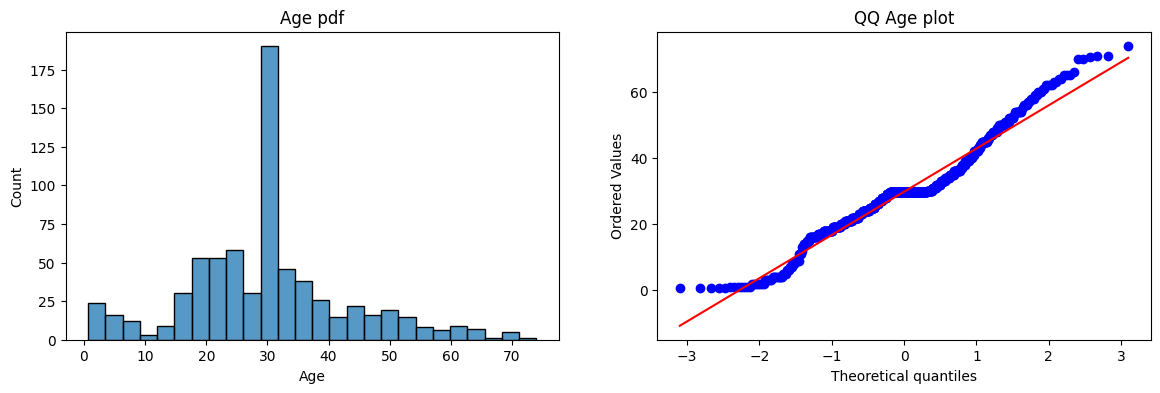

In [112]:
#EDA for Age

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Age'])
plt.title("Age pdf")

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title("QQ Age plot")

plt.show()

# From the above diagram we can conclude that the age column is more or less in Normal distribution

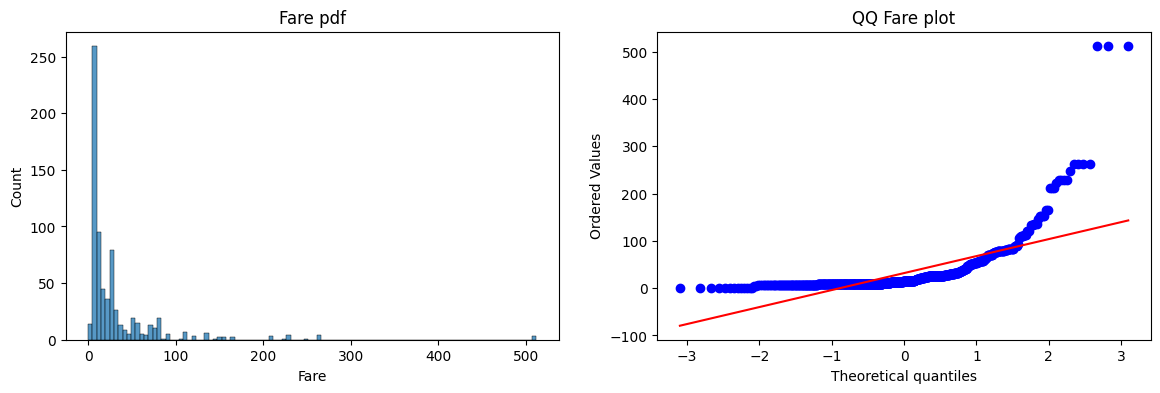

In [113]:
#EDA for fare
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Fare'])
plt.title("Fare pdf")

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title("QQ Fare plot")

plt.show()


# From the above EDA, it can be concluded that fare column is in Right-skewed and should be in Normal distribution 

# Without function transformation

In [114]:
lr=LogisticRegression()

In [117]:
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6983240223463687


# with using log transform

In [119]:
trf=ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder='passthrough')

In [122]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)

In [123]:
lr=LogisticRegression()

In [126]:
lr.fit(X_train_transformed, y_train)
y_pred=lr.predict(X_test_transformed)
print("Accuracy after log:", accuracy_score(y_test, y_pred))

Accuracy after log: 0.664804469273743
